In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '0'
TR = '0'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 573
INFO:root:Data length after removing invalid tweets: 122
INFO:root:Original data length: 9000
INFO:root:After applying filters: 5093
INFO:root:Data length after removing invalid tweets: 1030
INFO:root:Explained variance of the SVD step: 28%


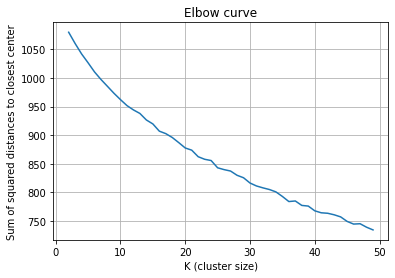

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

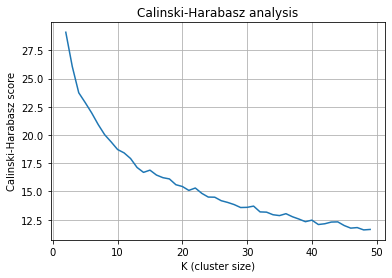

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

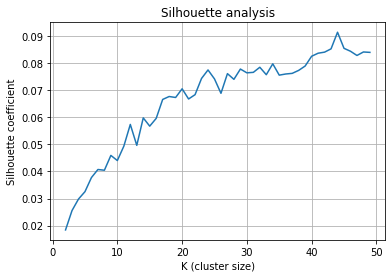

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

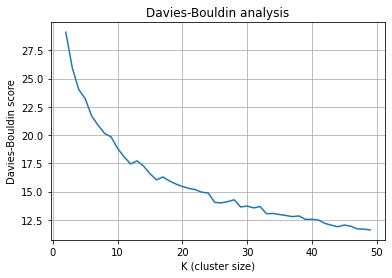

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 woman rape hysterical man cunt just men victim cory booker

Cluster 1:
 men women rape like say trash just sexual saying cheat

Cluster 2:
 like people just don dick cause life immigration know pussy

Cluster 3:
 immigrant children song parents illegal america kids white families mentality

Cluster 4:
 bitch fuck cunt fucking ass whore im like slut shut



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [  45  990  743   63  121   83   43 1096  966   60]
['18806', 'aka that stupid man with the ugly toes that couldnt even do his own grocery shopping BITCH charge me for this neck ass hoe ill yank ur slides off and go full chancla on u BITCH fucking BITCH fuck U fuck RETAIL oh my god bruh PLEASE may i punch YOU', '0', '0', '0']

['8498', "who the fuck is calling my girl a whore and a bitch? She hasn't even been at that school for a whole month, people are fucking stupid", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['7865', "Apparently I'm too negative. Well fuck you, suck my dick, faggots. How's that for fucking negative, you bitch ass cunts? Fuck you", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['18903', 'i was also clenching my jaw and further grinding the fuck out of my poor teeth, while saying pleasant things like "die you fucking bitch, you fucking cunt mo

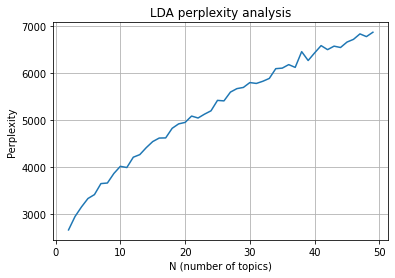

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=50, X=X)

In [10]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['like', 'people', 'rape', 'bitch', 'immigrant', 'whore', 'leave', 'women', 'niggas', 'slut']
Topic:  1
['women', 'like', 'just', 'men', 'fucking', 'fuck', 'ass', 'bitch', 'time', 'pussy']
Topic:  2
['men', 'women', 'rape', 'know', 'don', 'just', 'hysterical', 'people', 'hoe', 'stop']
Topic:  3
['just', 'bitch', 'woman', 'rape', 'women', 'dick', 'girl', 'people', 'fuck', 'cunt']
Topic:  4
['men', 'woman', 'women', 'people', 'say', 'immigrant', 'like', 'bitch', 'rape', 'year']
Topic:  5
['like', 'dick', 'shit', 'just', 'immigrant', 'fuck', 'woman', 'good', 'look', 'stupid']
Topic:  6
['immigrant', 'bitch', 'like', 'don', 'make', 'women', 'children', 'man', 'cunt', 'fucking']
Topic:  7
['like', 'bitch', 'whore', 'dont', 'im', 'men', 'fuck', 'cunt', 'want', 'yall']
Topic:  8
['men', 'women', 'just', 'people', 'like', 'fuck', 'immigrant', 'pro', 'tip', 'rape']
Topic:  9
['people', 'cunt', 'just', 'stupid', 'fuck', 'bitch', 'want', 'way', 'immigration', 'country']
